In [35]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import math
from datetime import datetime
import statistics
import seaborn as sn
import numpy as np

In [36]:
# reading the csv file
data = pd.read_csv('Data/station_data.csv')

# testing the read command
#print(data)

In [37]:
# inserting data to lists
dates = data['Data'].tolist()
time = data['Hora (UTC)'].tolist()
temp_inst = data['Temp. Ins. (C)'].fillna(method = 'bfill').tolist()
temp_max = data['Temp. Max. (C)'].tolist()
temp_min = data['Temp. Min. (C)'].tolist()
umidity_inst = data['Umi. Ins. (%)'].fillna(method = 'bfill').tolist()
umidity_max = data['Umi. Max. (%)'].tolist()
umidity_min = data['Umi. Min. (%)'].tolist()
dew_inst = data['Pto Orvalho Ins. (C)'].fillna(method = 'bfill').tolist()
dew_max = data['Pto Orvalho Max. (C)'].tolist()
dew_min = data['Pto Orvalho Min. (C)'].tolist()
pressure_inst = data['Pressao Ins. (hPa)'].fillna(method = 'bfill').tolist()
pressure_max = data['Pressao Max. (hPa)'].tolist()
pressure_min = data['Pressao Min. (hPa)'].tolist()
wind_speed = data['Vel. Vento (m/s)'].fillna(method = 'bfill').tolist()
wind_dir = data['Dir. Vento (m/s)'].fillna(method = 'bfill').tolist()
wind_gust = data['Raj. Vento (m/s)'].fillna(method = 'bfill').tolist()
radiation = data['Radiacao (KJ/m²)'].fillna(method = 'bfill').tolist()
precip = data['Chuva (mm)'].fillna(method = 'bfill').tolist()

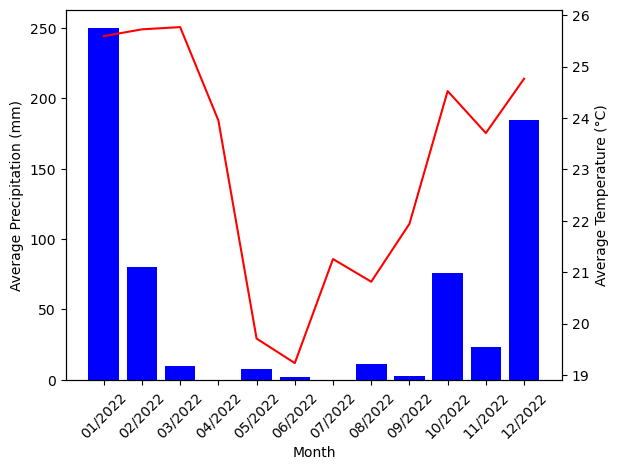


Total Annual Preciptation: 646.20 mm
Daily Average Precipitation: 1.77 mm
Monthly Average Precipitation: 53.85 mm


In [38]:
# Monthly precipitation graph throughout the year
monthly_precip = {}
for i in range(len(dates)):
    date = datetime.strptime(dates[i], '%d/%m/%Y')
    month = date.strftime('%m/%Y')
    if month in monthly_precip:
        monthly_precip[month] += precip[i]
    else:
        monthly_precip[month] = precip[i]

for month, prec in monthly_precip.items():
    monthly_precip[month] = round(prec, 2)

# separating months and precipitation values
months = list(monthly_precip.keys())
precipi = list(monthly_precip.values())

# couting temperatures for each month
monthly_temp = {}
for i in range(len(dates)):
    date = datetime.strptime(dates[i], '%d/%m/%Y')
    month = date.strftime('%m/%Y')
    if month in monthly_temp:
        if not math.isnan(temp_inst[i]):
            monthly_temp[month]['total'] += temp_inst[i]
            monthly_temp[month]['count'] += 1
    else:
        monthly_temp[month] = {'total': temp_inst[i], 'count': 1}

# calculate average temperature for each month
for month, data in monthly_temp.items():
    avg_temp = data['total'] / data['count']
    monthly_temp[month]['avg_temp'] = avg_temp

# storing the temperatures in a list
monthly_avg_temp = []
for month, data in monthly_temp.items():
    monthly_avg_temp.append(data['avg_temp'])

# making a dual axis graph
fig, ax1 = plt.subplots()

# Plot average precipitation on left y-axis
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Precipitation (mm)')
ax1.bar(months, precipi, color = 'blue')
plt.xticks(rotation = 45)

# Create a twin axis for temperature on the right side
ax2 = ax1.twinx()

# Plot average temperature on right y-axis
ax2.set_ylabel('Average Temperature (°C)')
ax2.plot(months, monthly_avg_temp, color='red')
plt.show()

# Total annual preciptation
annual_precip = sum(precip)
print(f'\nTotal Annual Preciptation: {annual_precip:.2f} mm')

# Daily average of precipitation
daily_aver_precip = annual_precip / 365
print(f'Daily Average Precipitation: {daily_aver_precip:.2f} mm')

# Monthly mean
mean_mprec = statistics.mean(precipi)
print(f'Monthly Average Precipitation: {mean_mprec:.2f} mm')

In [39]:
# standard deviation per month
monthly_precip2 = {}
for i in range(len(dates)):
    date = datetime.strptime(dates[i], '%d/%m/%Y')
    month = date.strftime('%m/%Y')
    if month in monthly_precip2:
        monthly_precip2[month].append(precip[i])
    else:
        monthly_precip2[month] = [precip[i]]  
 
test1 = []

    # January
jan_precip = monthly_precip2['01/2022']
jan_std = statistics.stdev(jan_precip)
jan_precip_mean = statistics.mean(jan_precip)

    # February
feb_precip = monthly_precip2['02/2022']
feb_std = statistics.stdev(feb_precip)
feb_precip_mean = statistics.mean(feb_precip)

    # March
mar_precip = monthly_precip2['03/2022']
mar_std = statistics.stdev(mar_precip)
mar_precip_mean = statistics.mean(mar_precip)

    # April
apr_precip = monthly_precip2['04/2022']
apr_std = statistics.stdev(apr_precip)
apr_precip_mean = statistics.mean(apr_precip)

    # May
may_precip = monthly_precip2['05/2022']
may_std = statistics.stdev(may_precip)
may_precip_mean = statistics.mean(may_precip)

    # June
jun_precip = monthly_precip2['06/2022']
jun_std = statistics.stdev(jun_precip)
jun_precip_mean = statistics.mean(jun_precip)

    # July
jul_precip = monthly_precip2['07/2022']
jul_std = statistics.stdev(jul_precip)
jul_precip_mean = statistics.mean(jul_precip)

    # August
aug_precip = monthly_precip2['08/2022']
aug_std = statistics.stdev(aug_precip)
aug_precip_mean = statistics.mean(aug_precip)

    # September
sep_precip = monthly_precip2['09/2022']
sep_std = statistics.stdev(sep_precip)
sep_precip_mean = statistics.mean(sep_precip)

    # October
oct_precip = monthly_precip2['10/2022']
oct_std = statistics.stdev(oct_precip)
oct_precip_mean = statistics.mean(oct_precip)

    # November
nov_precip = monthly_precip2['11/2022']
nov_std = statistics.stdev(nov_precip)
nov_precip_mean = statistics.mean(nov_precip)

    # December
dec_precip = monthly_precip2['12/2022']
dec_std = statistics.stdev(dec_precip)
dec_precip_mean = statistics.mean(dec_precip)

# creating a dictionary
mean_precip = [jan_precip_mean, feb_precip_mean, mar_precip_mean, apr_precip_mean, may_precip_mean, jun_precip_mean, jul_precip_mean, aug_precip_mean, sep_precip_mean, oct_precip_mean, nov_precip_mean, dec_precip_mean]
std_precip = [jan_std, feb_std, mar_std, apr_std, may_std, jun_std, jul_std, aug_std, sep_std, oct_std, nov_std, dec_std]
dict_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_std = pd.DataFrame({
    'Months' : dict_months,
    'Precipitation Standard Deviation' : std_precip,
    'Monthly Average Precipitation (mm)' : mean_precip
})

print(df_std)

       Months  Precipitation Standard Deviation  \
0     January                          1.997628   
1    February                          0.947112   
2       March                          0.053367   
3       April                          0.000000   
4         May                          0.067710   
5        June                          0.022236   
6        July                          0.000000   
7      August                          0.088333   
8   September                          0.026649   
9     October                          0.765893   
10   November                          0.375612   
11   December                          1.573184   

    Monthly Average Precipitation (mm)  
0                             0.336022  
1                             0.119643  
2                             0.012903  
3                             0.000000  
4                             0.009946  
5                             0.002500  
6                             0.000000  
7       

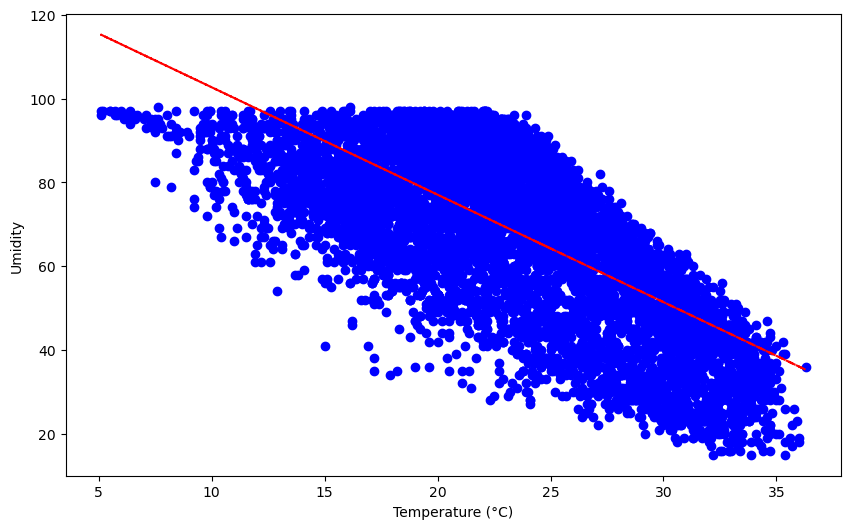

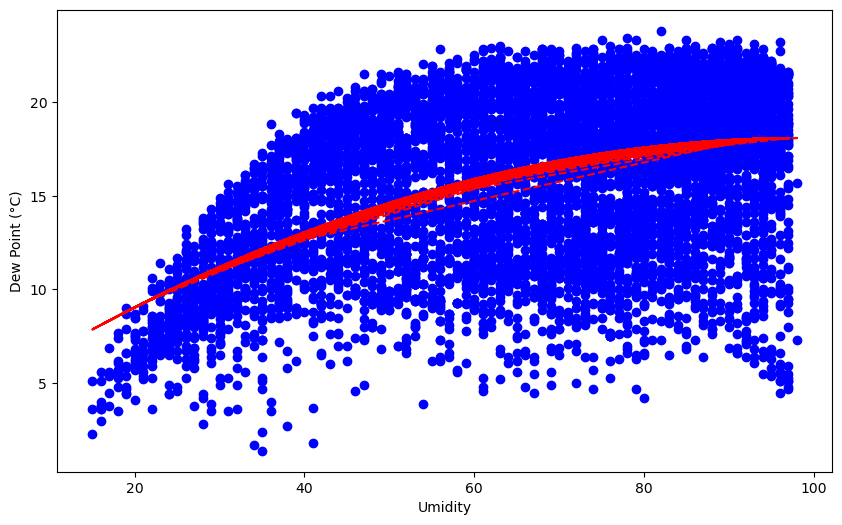

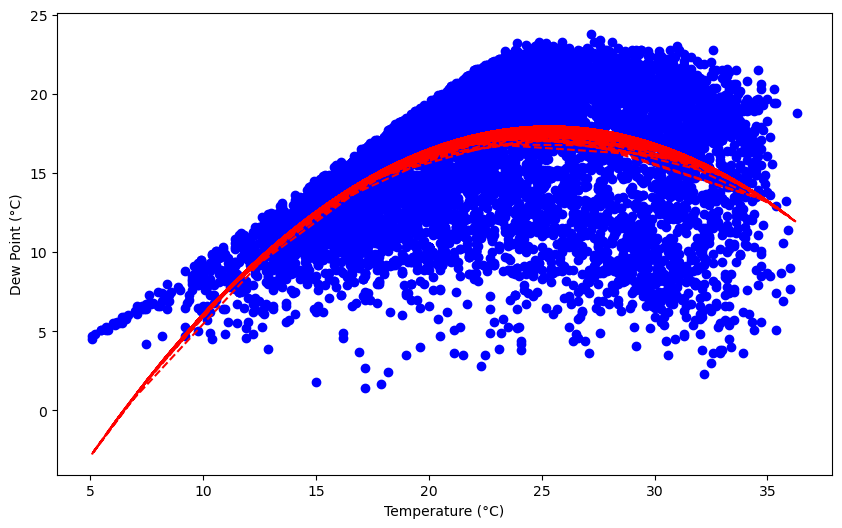

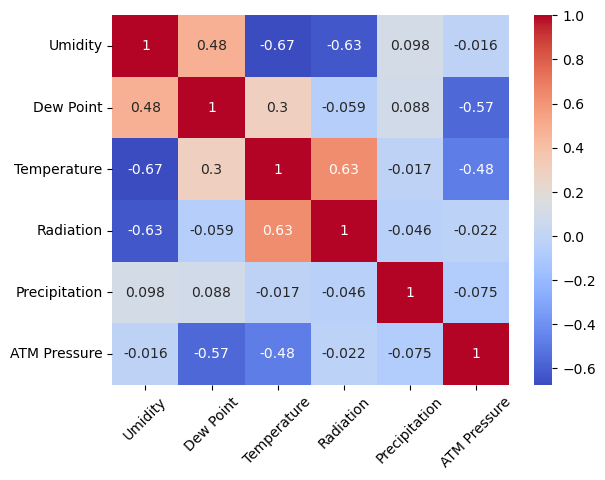

In [40]:
# Correlation between umidity, dew point, radiation, temperature and precipitation
df1 = pd.DataFrame({
    'Umidity' : umidity_inst,
    'Dew Point' : dew_inst,
    'Temperature' : temp_inst,
    'Radiation' : radiation,
    'Precipitation' : precip,
    'ATM Pressure' : pressure_inst
})

# graphs
    # scatter temperature/umidity
plt.figure(figsize = (10,6))
plt.scatter(temp_inst, umidity_inst, color = 'blue')
z = np.polyfit(temp_inst, umidity_inst, 1)
p = np.poly1d(z)
plt.plot(temp_inst, p(temp_inst), "r--")
plt.xlabel('Temperature (°C)')
plt.ylabel('Umidity')
plt.show()
    # scatter umidity/dew point
plt.figure(figsize = (10,6))
plt.scatter(umidity_inst, dew_inst, color = 'blue')
z = np.polyfit(umidity_inst, dew_inst, 2)
p = np.poly1d(z)
plt.plot(umidity_inst, p(umidity_inst), "r--")
plt.xlabel('Umidity')
plt.ylabel('Dew Point (°C)')
plt.show()
    # scatter temperature/dew point
plt.figure(figsize = (10,6))
plt.scatter(temp_inst, dew_inst, color = 'blue')
z = np.polyfit(temp_inst, dew_inst, 2)
p = np.poly1d(z)
plt.plot(temp_inst, p(temp_inst), "r--")
plt.xlabel('Temperature (°C)')
plt.ylabel('Dew Point (°C)')
plt.show()

# correlation matrix with heatmap
corr1 = df1.corr()
sn.heatmap(corr1, annot = True, cmap = 'coolwarm')
plt.xticks(rotation = 45)
plt.show()

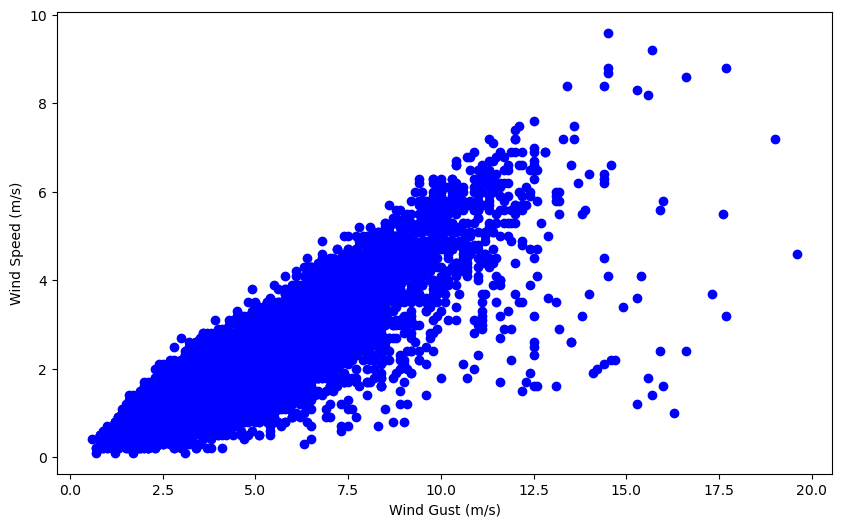

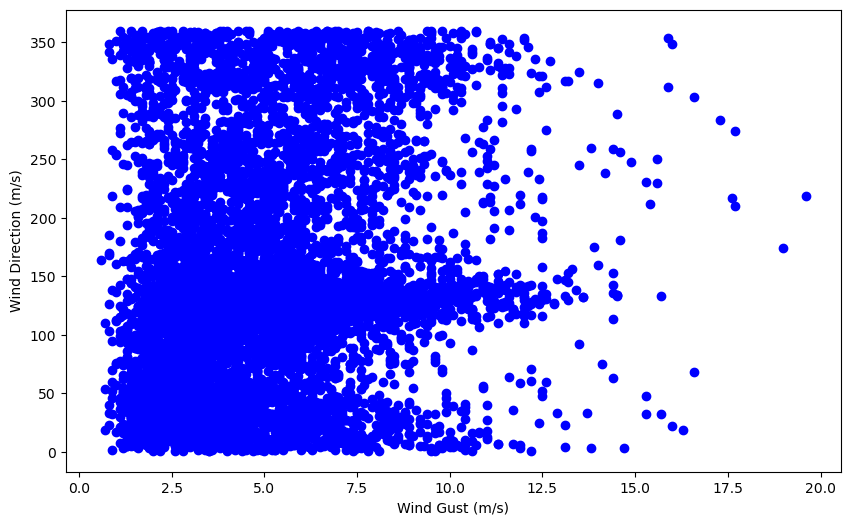

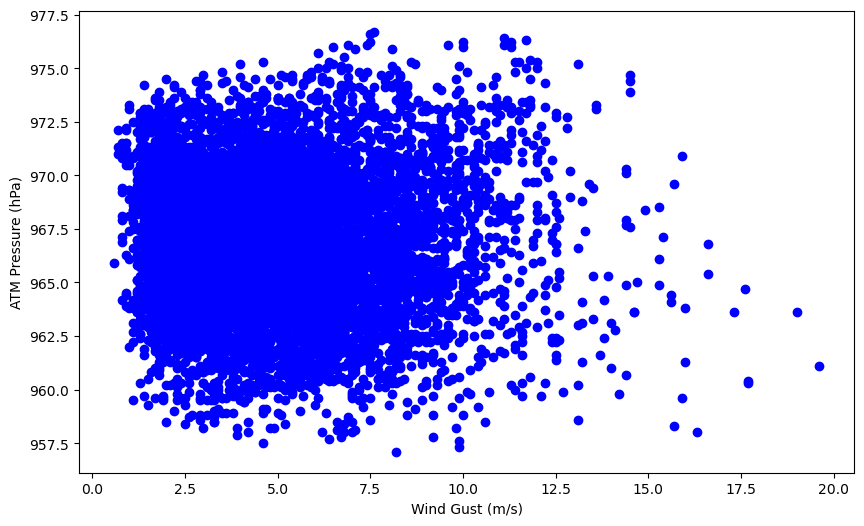

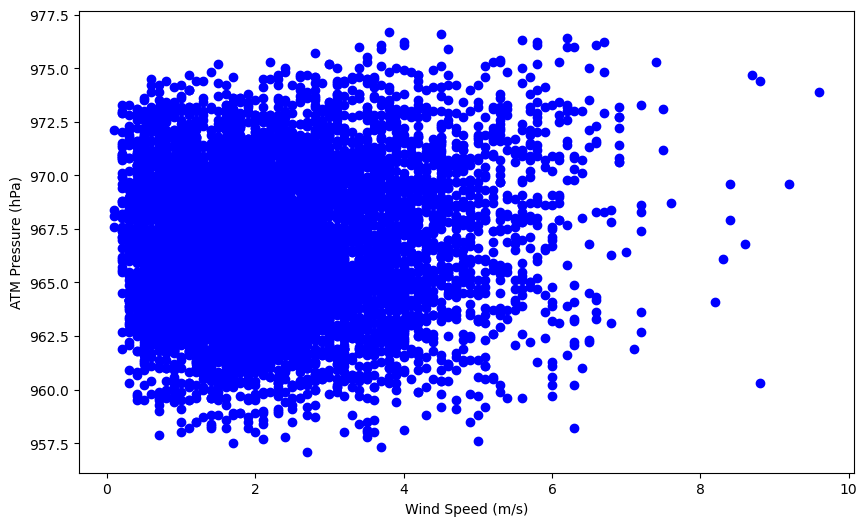

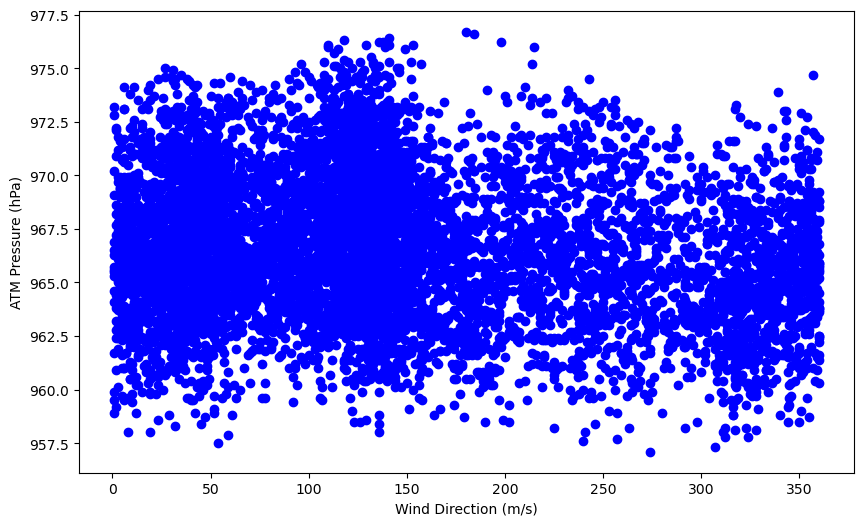

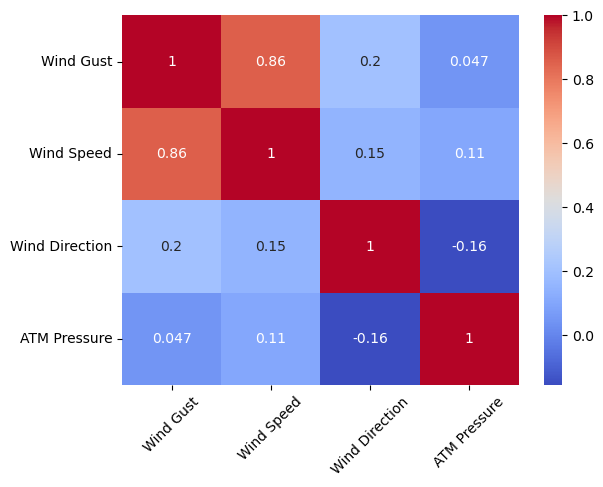

In [13]:
# dataframe with wind gust, wind speed, wind direction and atm pressure
df2 = pd.DataFrame({
    'Wind Gust' : wind_gust,
    'Wind Speed' : wind_speed,
    'Wind Direction' : wind_dir,
    'ATM Pressure' : pressure_inst
})

# graphs
    # scatter wind gust/speed
plt.figure(figsize = (10,6))
plt.scatter(wind_gust, wind_speed, color = 'blue')
plt.xlabel('Wind Gust (m/s)')
plt.ylabel('Wind Speed (m/s)')
plt.show()
    # scatter wind gust/direction
plt.figure(figsize = (10,6))
plt.scatter(wind_gust, wind_dir, color = 'blue')
plt.xlabel('Wind Gust (m/s)')
plt.ylabel('Wind Direction (m/s)')
plt.show()
    # scatter wind gust/pressure
plt.figure(figsize = (10,6))
plt.scatter(wind_gust, pressure_inst, color = 'blue')
plt.xlabel('Wind Gust (m/s)')
plt.ylabel('ATM Pressure (hPa)')
plt.show()
    # scatter wind speed/pressure
plt.figure(figsize = (10,6))
plt.scatter(wind_speed, pressure_inst, color = 'blue')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('ATM Pressure (hPa)')
plt.show()
    # scatter wind direction/pressure
plt.figure(figsize = (10,6))
plt.scatter(wind_dir, pressure_inst, color = 'blue')
plt.xlabel('Wind Direction (m/s)')
plt.ylabel('ATM Pressure (hPa)')
plt.show()

# Correlation Matrix with heatmap
corr2 = df2.corr()
sn.heatmap(corr2, annot = True, cmap = 'coolwarm')
plt.xticks(rotation = 45)
plt.show()